In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
# 导入函数
from model import captcha_model
from getData import gen

# 设置参数
from params import *

Using TensorFlow backend.


In [378]:
img = cv2.imread(trainDir + '/18_Kd4I.png', -1)

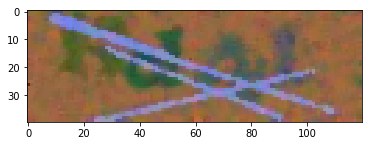

In [379]:
plt.imshow(np.asarray(img))
plt.show()

In [394]:
# 将图像转化为HSV通道，调搞亮度
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
v[:, :] = 200
img_bright = cv2.merge([h, s, v])
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_HSV2BGR)
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY)

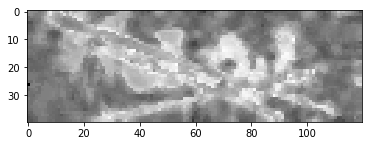

In [395]:
plt.imshow(np.asarray(img_bright), cmap = 'gray')
plt.show()

In [324]:
# scharr算子边缘检测
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)

scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)


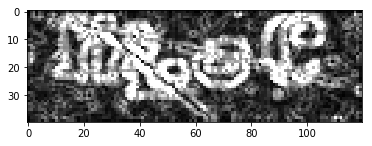

In [316]:
plt.imshow(np.asarray(scharrxy), cmap = 'gray')
plt.show()

In [317]:
# 拉普拉斯算子边缘检测
Laplacian = cv2.Laplacian(img, cv2.CV_64F)
Laplacian = cv2.convertScaleAbs(Laplacian)

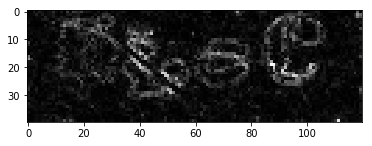

In [318]:
plt.imshow(np.asarray(Laplacian), cmap = 'gray')
plt.show()

In [319]:
# Canny 边缘检测
canny = cv2.Canny(img, 30, 60)

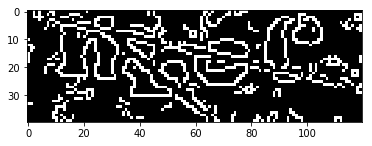

In [320]:
plt.imshow(np.asarray(canny), cmap = 'gray')
plt.show()

In [296]:
img_float = np.zeros((40, 160), dtype = np.float16)
img_float = img / 255
img_float = img * 255


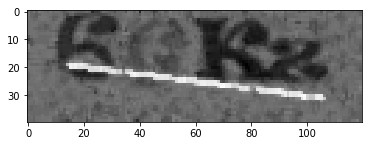

In [214]:
plt.imshow(np.asarray(img_float), cmap = 'gray')
plt.show()

In [109]:
img.shape

(40, 120)

In [149]:
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)

In [150]:
#-----------------------------
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
#高通滤波器
mask1 = np.ones((rows, cols, 2), np.uint8)
mask1[crow-2:crow+2, ccol-2:ccol+2] = 0

#低通滤波器
mask2 = np.zeros((rows, cols, 2), np.uint8)
mask2[crow-20:crow+20, ccol-20:ccol+20] = 1

#带通滤波器
mask = mask1 * mask2


In [151]:
# 带通滤波器
dftShift = dftShift * mask1

In [152]:
resultShift = np.fft.ifftshift(dftShift)
# result = np.fft.ifft2(resultShift)
result = cv2.idft(resultShift)
img_new = cv2.magnitude(result[:, :, 0], result[:, :, 1])

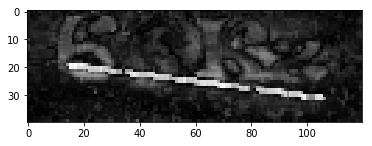

In [153]:
plt.imshow(np.asarray(img_new), cmap = 'gray')
plt.show()

In [157]:
img_new = img_new/np.asarray(img_new).max()*255

In [87]:
np.asarray(img_new).max()

225752.05

In [156]:
pd.DataFrame(img).to_csv('img.csv', header = False, index = False)

In [159]:
pd.DataFrame(img_new).to_csv('img_new.csv', header = False, index = False)